# Predicting Total Revenue for a Ground

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import random
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




# graph settings : 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# Loading Dataset
groundOwners_df = pd.read_csv ('./regression_dataset.csv')
groundOwners_df

,Date,Year,Day,Month,GroundName,Cost,TotalCustomers
0,1,2012,Monday,January,Ground1,905,13
1,2,2012,Thursday,January,Ground1,845,12
2,3,2012,Saturday,January,Ground1,500,9
3,4,2012,Friday,January,Ground1,755,12
4,5,2012,Sunday,January,Ground1,855,14
...,...,...,...,...,...,...,...
14395,26,2021,Tuesday,December,Ground4,735,11
14396,27,2021,Friday,December,Ground4,750,11
14397,28,2021,Monday,December,Ground4,650,9
14398,29,2021,Tuesday,December,Ground4,315,6


In [3]:
# Segregating data w.r.t each ground
gO1_Cost_df = groundOwners_df.loc[groundOwners_df['GroundName'] == 'Ground1']
gO2_Cost_df = groundOwners_df.loc[groundOwners_df['GroundName'] == 'Ground2']
gO3_Cost_df = groundOwners_df.loc[groundOwners_df['GroundName'] == 'Ground3']
gO4_Cost_df = groundOwners_df.loc[groundOwners_df['GroundName'] == 'Ground4']


# Analytics of Dataset 

In [ ]:
def randomColor():
    r = lambda: random.randint(0,255)
    
def HistCreateCostCategorical(gDF,x,cat):
    col_dis_seq = []
    for i in range(0,x):
        col_dis_seq.append(randomColor())
    fig = px.histogram(gDF, 
                       x='Cost', 
                       marginal='box', 
                       color=cat, 
                       color_discrete_sequence=col_dis_seq, 
                       title='Revenue of Ground based on '+cat)
    
    fig.update_layout(bargap=0.1)
    fig.show()

def HistCreateCategorical(gDF):
    df = gDF.groupby(['Month'],as_index=False, sort = False)['Cost','TotalCustomers'].sum()
    fig1 = px.histogram(df, x="Month", y=["TotalCustomers"], title = "Total Customers in Each Month")
    fig1.show()
    fig2 = px.histogram(df, x="Month", y=["Cost"], title = "Cost of Each Month")
    fig2.show()
    
    
def CostWithOtherVars(gDF):
    fig = px.scatter(gDF,
                    x=other_var)

    
def FindCorrWithCost(gDF):
    day_values ={'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

    timeslot_values = {'timeslot1':0,'timeslot2':1,'timeslot3':2,'timeslot4':3,'timeslot5':4,'timeslot6':5,'timeslot7':6}

    month_values = {'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December':11}

    sport_values = {'sport1':0,'sport2':1,'sport3':2,'sport4':3,'sport5':4,'sport6':5}


    day_numeric =groundOwner1_df["Day"].map(day_values)
    print("Day with Cost :")
    print(groundOwner1_df["Cost"].corr(day_numeric))


    month_numeric =groundOwner1_df["Month"].map(month_values)
    print("Month with Cost :")
    print(groundOwner1_df["Cost"].corr(month_numeric))

    timeslot_numeric =groundOwner1_df["TimeSlot"].map(timeslot_values)
    print("TimeSlot with Cost :")
    print(groundOwner1_df["Cost"].corr(timeslot_numeric))

    sport_numeric =groundOwner1_df["Sport"].map(sport_values)
    print("Sport with Cost :")
    print(groundOwner1_df["Cost"].corr(sport_numeric))
    
    
def AnalyticsPipeline1(gDF):
    print(gDF)
    print("\nInformation about the Data for Ground")
    gDF.info()
    print("\nStatistics about the Revenue Data for Ground")
    print(gDF.describe())
    fig = px.histogram(gDF, 
                   x='Cost', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Cost')
    fig.update_layout(bargap=0.1)
    fig.show()
    
    print("\nDistribution of Categorical Variables")
    HistCreateCategorical(gDF)
    
    print("\nRelationship of Day with Cost")
    temp_fig =px.violin(gDF,x="Day",y="Cost",color="Month")
    temp_fig.show()

    print("\nRelationship of Month with Cost")
    temp_fig =px.violin(gDF,x="Month",y="Cost",color="Year")
    temp_fig.show()
    
   
    
#     print("\nFinding Correlation of Day,Month,TimeSlot,Sport with Cost")
#     FindCorrWithCost(gDF)

In [ ]:
AnalyticsPipeline1(gO1_Cost_df)

In [4]:
# correlation 
day_codes ={'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}

timeslot_codes = {'timeslot1':0,'timeslot2':1,'timeslot3':2,'timeslot4':3,'timeslot5':4,'timeslot6':5,'timeslot7':6}

month_codes = {'January':0,'February':1,'March':2,'April':3,'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December':11}

sport_codes = {'sport1':0,'sport2':1,'sport3':2,'sport4':3,'sport5':4,'sport6':5}

def correlation_matrix_ground(gDF):
    gDF['day_code'] = gDF["Day"].map(day_codes)
#     gDF['timeslot_code']= gDF["TimeSlot"].map(timeslot_codes)
    gDF['month_code']= gDF["Month"].map(month_codes)
#     gDF['sport_code']= gDF["Sport"].map(sport_codes)

    print(sns.heatmap(gDF.corr(), cmap='Reds', annot=True))
    plt.title('Correlation Matrix- Ground Owner data')

AxesSubplot(0.125,0.125;0.62x0.755)


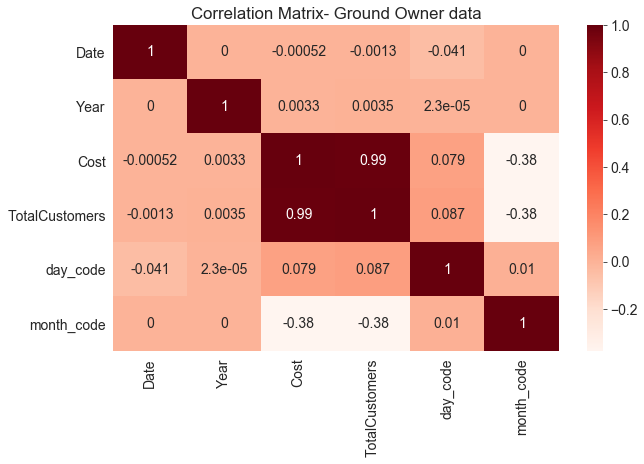

In [5]:
correlation_matrix_ground(gO1_Cost_df)

# Preprocessing for fitting into Models

In [6]:
print(gO1_Cost_df.shape)
gO1_Cost_df.nunique()

(3600, 9)


Date               30
Year               10
Day                 7
Month              12
GroundName          1
Cost              441
TotalCustomers     36
day_code            7
month_code         12
dtype: int64

In [7]:
gO1_Cost_df = gO1_Cost_df.drop(['Date','Year','GroundName','day_code','month_code'],axis=1)
# gO1_Cost_df = pd.get_dummies(gO1_Cost_df)
gO1_Cost_df.head()

,Day,Month,Cost,TotalCustomers
0,Monday,January,905,13
1,Thursday,January,845,12
2,Saturday,January,500,9
3,Friday,January,755,12
4,Sunday,January,855,14


# Predicting Total cost of the ground, total customers on a day

## Simple Linear Regression

In [15]:
# redefining data for simple linear regression

linear_1 = gO1_Cost_df[['TotalCustomers','Cost']]
print(linear_1.shape)
linear_1.head()

(3600, 2)


,TotalCustomers,Cost
0,13,905
1,12,845
2,9,500
3,12,755
4,14,855


Text(0, 0.5, 'Revenue of that day')

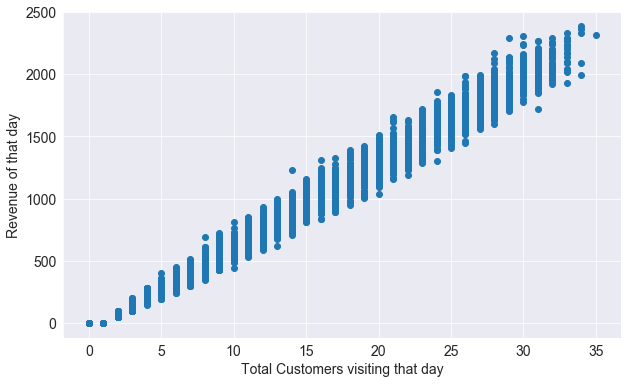

In [16]:
plt.scatter(linear_1['TotalCustomers'],linear_1['Cost'])
plt.xlabel('Total Customers visiting that day')
plt.ylabel('Revenue of that day')

In [17]:
# Selecting 

linear_1_X = linear_1.iloc[:,0:1]
linear_1_y = linear_1.iloc[:,1:]

# Splitting data into training (75%) and testing (25%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(linear_1_X,linear_1_y,test_size = 0.25,random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 2700 rows
Test Set: 900 rows


In [18]:
# Fitting the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_model = LinearRegression().fit(X_train,y_train)
print(lr_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [19]:
# Predicting Labels

y_pred = lr_model.predict(X_test)

plabels = []
for i in range(10):
    b = int((y_pred)[i][0])
    plabels.append(b)
    
alabels = []
for i in range(10):
    a = int(y_test.iloc[i])
    alabels.append(a)


print('Predicted labels: ', plabels)
print('Actual labels   : ' , alabels)

Predicted labels:  [140, 819, 1431, 684, 819, 208, 1363, 208, 887, 1567]
Actual labels   :  [180, 900, 1480, 810, 900, 180, 1410, 210, 950, 1595]


In [20]:
# Evaluation Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test,y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MAE: 63.06656115509816
MSE: 6636.70530844288
RMSE: 81.46597638550023
R2: 0.9799262982356686


Text(0, 0.5, 'Revenue of that day')

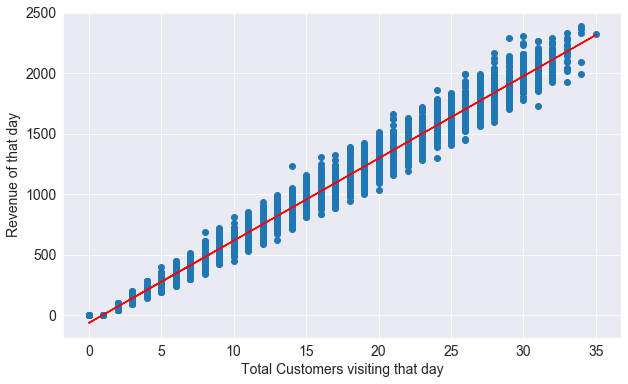

In [21]:
# line of best fit 
plt.scatter(linear_1['TotalCustomers'],linear_1['Cost'])
plt.plot(X_train.to_numpy(),lr_model.predict(X_train),color='red')
plt.xlabel('Total Customers visiting that day')
plt.ylabel('Revenue of that day')

In [22]:
w_lr_1 = lr_model.coef_
b_lr_1 = lr_model.intercept_
print('weight:'+str(w_lr_1))
print('bias :'+str(b_lr_1))
# revenue = w * totalCust + b

weight:[[67.92429398]]
bias :[-63.08002069]


## Generating Polynomial Features ##

In [8]:
# Importing Libraries
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [9]:
# Redefining Data for Polynomial Features

gO1_Cost_df = pd.get_dummies(gO1_Cost_df)
print(gO1_Cost_df.shape)
print(gO1_Cost_df.columns)
gO1_Cost_df.head()

(3600, 21)
Index(['Cost', 'TotalCustomers', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September'],
      dtype='object')


,Cost,TotalCustomers,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,905,13,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,845,12,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,500,9,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,755,12,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,855,14,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
X = gO1_Cost_df.iloc[:,1:]
y = gO1_Cost_df.iloc[:,0]

In [11]:
y.head()

0    905
1    845
2    500
3    755
4    855
Name: Cost, dtype: int64

In [12]:
X.head()

,TotalCustomers,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,13,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,12,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,9,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,14,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
# Generating Polynomial Features

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_poly[1]

array([  1.,  12.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 144.,
         0.,   0.,   0.,   0.,  12.,   0.,   0.,   0.,   0.,   0.,   0.,
        12.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [23]:
# Splitting data into training (75%) and testing (25%)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.25,random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 2700 rows
Test Set: 900 rows


In [24]:
X_test.shape

(900, 231)

## Polynomial Regression ##

In [25]:
# Fitting the Model

lr_3 = LinearRegression()
lr_3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Evaluation Metrics

y_pred = lr_3.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MAE: 64.62420462714302
MSE: 7015.95107092502
RMSE: 83.76127429143506
R2: 0.9787792130514329


## Ridge Regression(ohe) (mse, sgd)

In [27]:
# Fitting the model

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
l4_ridge = Ridge(alpha = 0.0001)
l4_ridge.fit(X_train,y_train)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
# Predicting the labels

y_pred = l4_ridge.predict(X_test)

plabels = []
for i in range(10):
    b = int((y_pred)[i])
    plabels.append(b)
    
alabels = []
for i in range(10):
    a = int(y_test.iloc[i])
    alabels.append(a)


print('Predicted labels: ', plabels)
print('Actual labels   : ' , alabels)


Predicted labels:  [156, 818, 1442, 694, 800, 207, 1375, 204, 894, 1563]
Actual labels   :  [180, 900, 1480, 810, 900, 180, 1410, 210, 950, 1595]


In [29]:
# Evaluation Metrics

mae = mean_absolute_error(y_test,y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MAE: 64.61879468792944
MSE: 7015.405616250836
RMSE: 83.75801822065058
R2: 0.9787808628601778


## SGD Regressor ##

In [30]:
# Defining Model
from sklearn.linear_model import SGDRegressor
l4_sgd = SGDRegressor(max_iter = 500,learning_rate="constant",alpha=0.001)

In [31]:
# Fitting the Model

l4_sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=500,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [32]:
# Predicting Labels

y_pred = l4_sgd.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MAE: 132241730161361.66
MSE: 2.873311232440639e+28
RMSE: 169508443224537.9
R2: -8.690756945730578e+22


In [33]:
# Changing Parameters

l4_ridge_sgd = Ridge(alpha=0.001,max_iter=500,solver="sparse_cg")
l4_ridge_sgd.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=500,
      normalize=False, random_state=None, solver='sparse_cg', tol=0.001)

In [34]:
# Evaluation Metrics

y_pred = l4_ridge_sgd.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MAE: 74.60516168629789
MSE: 8980.123971117073
RMSE: 94.76351603395197
R2: 0.9728382801367412


## Lasso Regression(ohe)


In [35]:
# Finding the best coefs according to r2 score
# Splitting data into training (75%) and testing (25%)
from sklearn.linear_model import Lasso

coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    
print(r2_scores)

[0.9787933280250504, 0.9794076644698692, 0.9796050577055139, 0.979651339584793]


In [36]:
# Best Parameters

print('Alpha = 0, r2_score={}'.format(round(r2_scores[0],4)))

print('Alpha = 0.1, r2_score={}'.format(round(r2_scores[1],4)))


print('Alpha = 1, r2_score={}'.format(round(r2_scores[2],4)))

print('Alpha = 10, r2_score={}'.format(round(r2_scores[3],4)))


Alpha = 0, r2_score=0.9788
Alpha = 0.1, r2_score=0.9794
Alpha = 1, r2_score=0.9796
Alpha = 10, r2_score=0.9797


In [38]:
reg = Lasso(alpha=10)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MAE: 63.66422954321389
MSE: 6727.61128877932
RMSE: 82.02201709772395
R2: 0.979651339584793


## ElasticNet Regression (ohe)

In [ ]:
#if you do not know the importance of your columns, use elastic Net regression 
#its loss function is a combination of both lasso and ridge
# also used when there is multi collinearity between input columns

In [40]:
# Fitting the model
from sklearn.linear_model import LinearRegression,ElasticNet
l6_elasticNet = ElasticNet(alpha=0.005,l1_ratio=0.9)
l6_elasticNet.fit(X_train,y_train)

ElasticNet(alpha=0.005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
# Evaluation Metrics

y_pred = l6_elasticNet.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MAE: 64.32855779971882
MSE: 6956.573305871528
RMSE: 83.40607475401013
R2: 0.9789588099284556
